# Import all packages

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# import data

In [2]:
TrainFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_train.csv")
TestFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_test.csv")

In [3]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
TrainFile.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

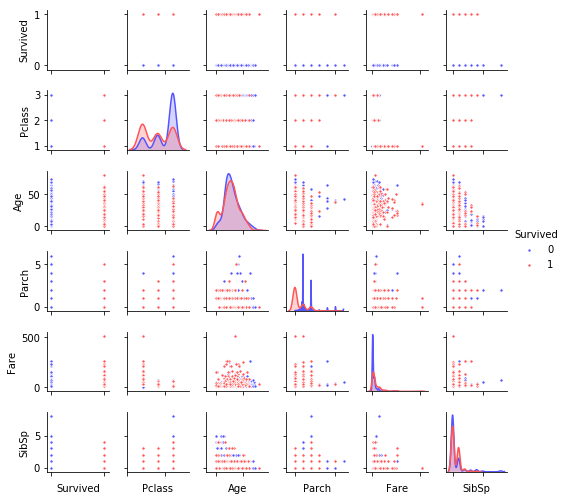

In [6]:
g = sns.pairplot(TrainFile[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'SibSp']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

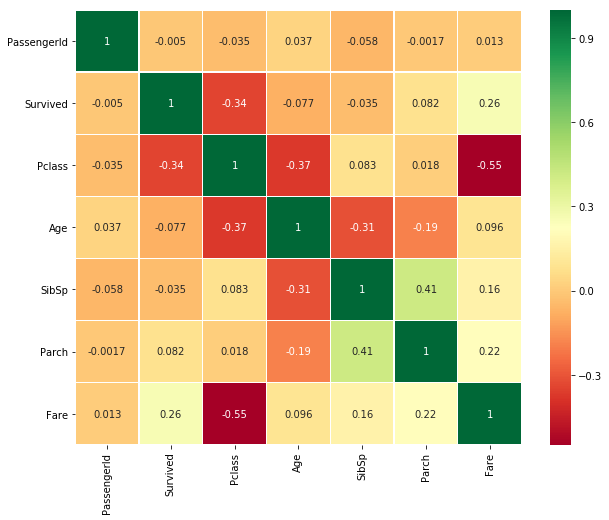

In [7]:

sns.heatmap(TrainFile.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [8]:

print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(TrainFile.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(TestFile.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [10]:
## reading about how it sank, it got hit at the ends
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

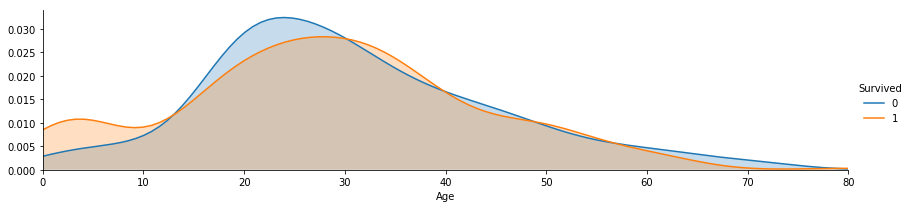

In [11]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, TrainFile['Age'].max()))
facet.add_legend()
 
plt.show()

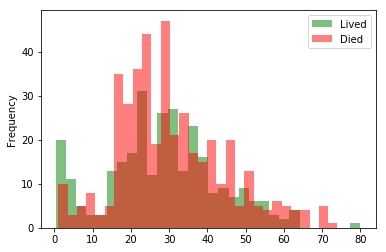

In [12]:
##Looking at the distribution of those who survived and didnt by age.
Lived = TrainFile[TrainFile["Survived"] == 1]
Died = TrainFile[TrainFile["Survived"] == 0]
Lived["Age"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Age"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

In [13]:
full_data = [TrainFile, TestFile]

In [14]:
##Fill ages with median values to avoild null values in ML
TestFile['Age'].fillna(TestFile['Age'].median(), inplace = True)
TrainFile['Age'].fillna(TrainFile['Age'].median(), inplace = True)

In [15]:
print('Highest Age:',TrainFile['Age'].max(),'   Lowest Age:',TrainFile['Age'].min())

Highest Age: 80.0    Lowest Age: 0.42


In [16]:
#Group Age to make it easier for classification since it looks like there is a clear delineation between the ages and what it does.

for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

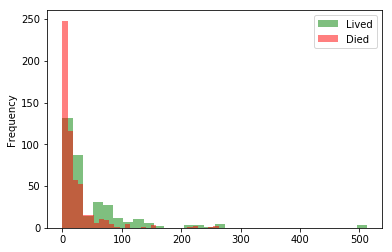

In [17]:
##checking by fare amount
Lived["Fare"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Fare"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

In [18]:
TestFile['Fare'].fillna(TestFile['Fare'].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


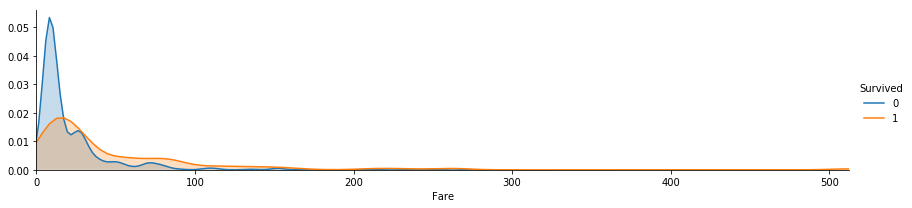

In [19]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, TrainFile['Fare'].max()))
facet.add_legend()
plt.show()

(0, 200)

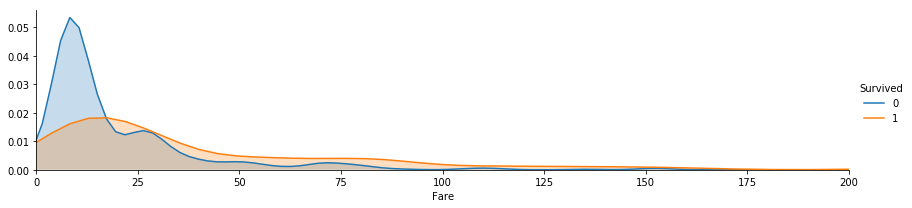

In [20]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, TrainFile['Fare'].max()))
facet.add_legend()
plt.xlim(0, 200)

In [21]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 160), 'Fare'] = 3,
    dataset.loc[ dataset['Fare'] > 160, 'Fare'] = 4

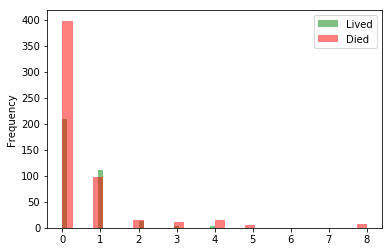

In [22]:
##checking by number of siblings
Lived["SibSp"].plot.hist(alpha=0.5,color='green',bins=30)
Died["SibSp"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

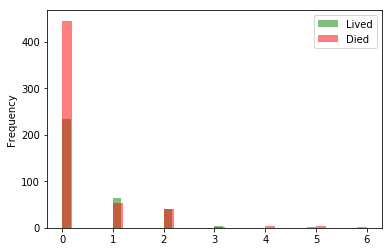

In [23]:

Lived["Parch"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Parch"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

In [24]:
##Make family size from parents and siblings data
TrainFile["FamilySize"] = TrainFile["SibSp"] + TrainFile["Parch"] + 1
TestFile["FamilySize"] = TestFile["SibSp"] + TestFile["Parch"] + 1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


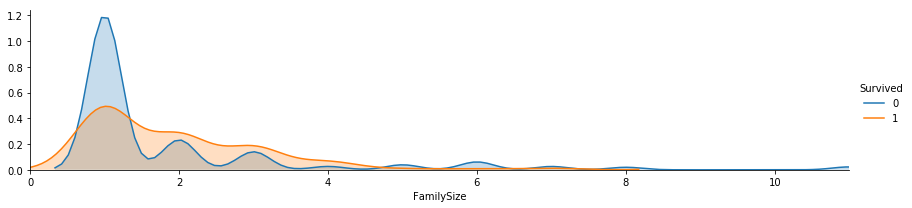

In [25]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, TrainFile['FamilySize'].max()))
facet.add_legend()
plt.show()

In [26]:
family = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in full_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family)

In [27]:
##change some categories
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
TrainFile["Sex"] = num.fit_transform(TrainFile["Sex"].astype("str"))
TestFile["Sex"] = num.fit_transform(TestFile["Sex"].astype("str"))
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.0,NaN,S,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,2.0,C85,C,0.4
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,2.0,C123,S,0.4
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,NaN,S,0.0


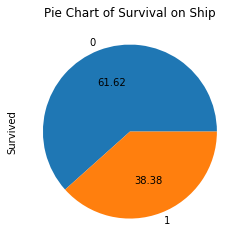

In [28]:
TrainFile["Survived"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Survival on Ship")

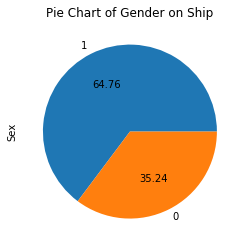

In [29]:
##Plot of female vs male in file
TrainFile["Sex"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Gender on Ship")

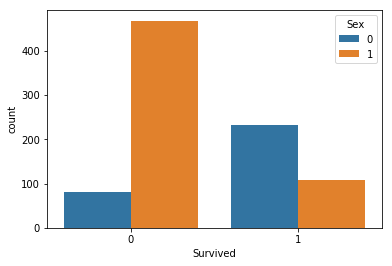

In [30]:
sns.countplot(x="Survived", hue="Sex", data=TrainFile)

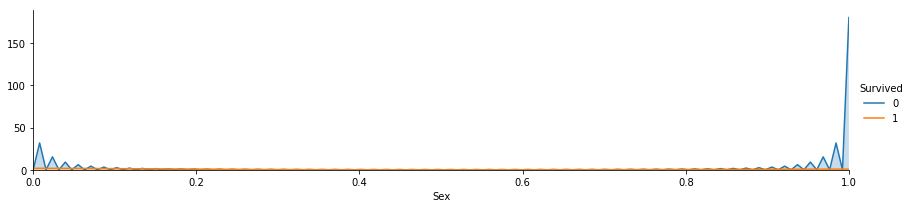

In [32]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Sex',shade= True)
facet.set(xlim=(0, TrainFile['Sex'].max()))
facet.add_legend()
plt.show()

In [31]:
TrainFile["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [33]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [34]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

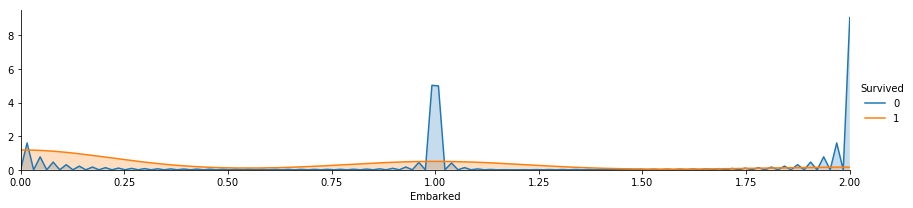

In [35]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Embarked',shade= True)
facet.set(xlim=(0, TrainFile['Embarked'].max()))
facet.add_legend()
plt.show()

In [36]:
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

TestFile['Cabin'].fillna(TestFile['Cabin'].median(), inplace = True)
TrainFile['Cabin'].fillna(TrainFile['Cabin'].median(), inplace = True)    


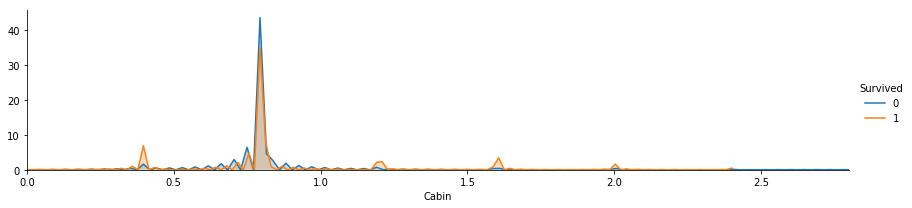

In [37]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Cabin',shade= True)
facet.set(xlim=(0, TrainFile['Cabin'].max()))
facet.add_legend()
plt.show()

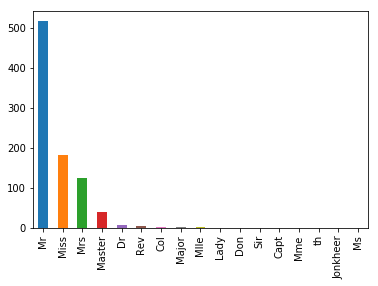

In [42]:
TrainFile['Title'] = TrainFile['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]
TestFile['Title'] = TestFile['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

TrainFile['Title'].value_counts().plot.bar()

TrainFile[TrainFile['Title'] == 'Mr']['Survived'].value_counts()

TrainFile[TrainFile['Title'] == 'Miss']['Survived'].value_counts()

TrainFile['Title'] = TrainFile['Title'].map({'Mr' : 0 , 'Master' : 3, 'Don' : 4, 'Major' : 4, 'Sir' : 4, 
                                           'Mrs' : 2 , 'Miss' : 1, 'Mme' : 4, 'Ms' : 4, 'Lady' : 4, 'Mlle': 4, 
                                           'Rev' : 4 , 'Col' : 4, 'Capt' : 4, 'th' : 4, 'Jonkheer' : 4, 'Dr' : 4})

TestFile['Title'] = TestFile['Title'].map({'Mr' : 0 , 'Master' : 3, 'Don' : 4, 'Major' : 4, 'Sir' : 4, 
                                           'Mrs' : 2 , 'Miss' : 1, 'Mme' : 4, 'Ms' : 4, 'Lady' : 4, 'Mlle': 4, 
                                           'Rev' : 4 , 'Col' : 4, 'Capt' : 4, 'th' : 4, 'Jonkheer' : 4, 'Dr' : 4, 'Dona' : 4})

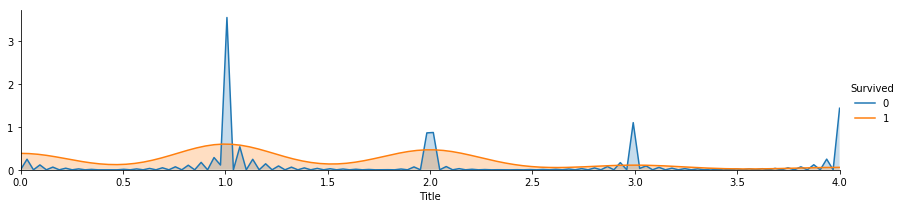

In [44]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Title',shade= True)
facet.set(xlim=(0, TrainFile['Title'].max()))
facet.add_legend()
plt.show()

In [43]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.0,0.8,0,0.4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,2.0,0.8,1,0.4,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,0.0,0.8,0,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,2.0,0.8,0,0.4,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,0.8,0,0.0,0


In [45]:
features_to_drop = ['Ticket', 'Name', 'SibSp', 'Parch']
train = TrainFile.drop(features_to_drop, axis=1)
test = TestFile.drop(features_to_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [46]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,3,1,1.0,0.0,0.8,0,0.4,0
1,1,0,3.0,2.0,0.8,1,0.4,2
2,3,0,1.0,0.0,0.8,0,0.0,1
3,1,0,2.0,2.0,0.8,0,0.4,2
4,3,1,2.0,0.0,0.8,0,0.0,0


In [48]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 13)
knnscore = cross_val_score(knn, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(knnscore)

[0.81111111 0.82022472 0.83146067 0.83146067 0.83146067 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [49]:
# kNN Score
round(np.mean(knnscore)*100, 2)

82.83

In [50]:
##decision tree Score
Dec = DecisionTreeClassifier()
Decscore = cross_val_score(Dec, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(Decscore)

[0.77777778 0.82022472 0.78651685 0.78651685 0.86516854 0.80898876
 0.82022472 0.79775281 0.75280899 0.82022472]


In [51]:
round(np.mean(Decscore)*100, 2)

80.36

In [52]:
##Naive Bayes
NB = GaussianNB()
NBscore = cross_val_score(NB, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(NBscore)

[0.81111111 0.76404494 0.7752809  0.74157303 0.74157303 0.7752809
 0.78651685 0.83146067 0.83146067 0.83146067]


In [53]:
round(np.mean(NBscore)*100, 2)

78.9

In [54]:
## SVM

clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.83333333 0.80898876 0.82022472 0.82022472 0.84269663 0.82022472
 0.83146067 0.85393258 0.84269663 0.84269663]


In [56]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

83.16

In [58]:
##Random Forest
rafo = RandomForestClassifier()
rafoscore = cross_val_score(rafo, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(rafoscore)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.78888889 0.84269663 0.83146067 0.79775281 0.84269663 0.78651685
 0.83146067 0.80898876 0.76404494 0.83146067]


In [59]:
round(np.mean(rafoscore)*100, 2)

81.26

In [61]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [63]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
